# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)


## Carga de datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

## Manejo de datos nulos


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)

## Eliminar id


In [8]:
df.drop('customerID', axis=1, inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numérico variable objetivo


In [10]:
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

In [11]:
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [12]:
df_processed = df.copy()

## Manejo de variables categóricas


In [13]:
df_processed = pd.get_dummies(df_processed)

In [14]:
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## Analisis de correlación


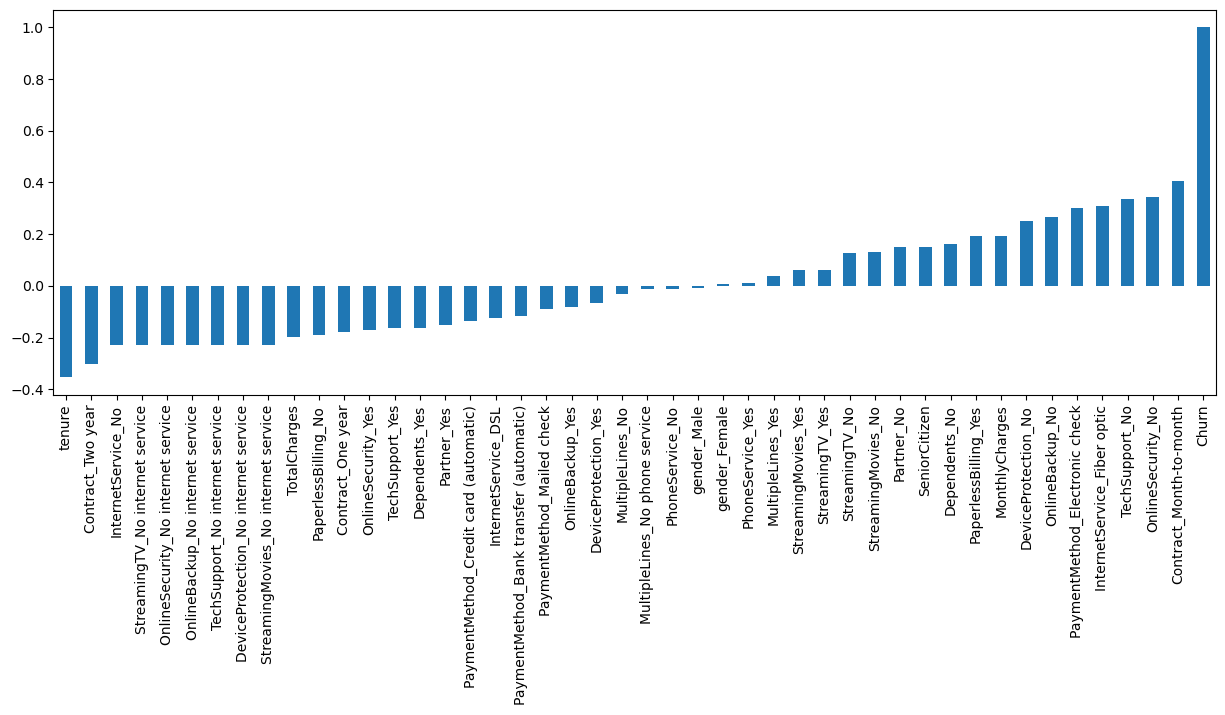

In [15]:
fig = plt.figure(figsize=(15, 5))
df_processed.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [32]:
X = df_processed.drop('Churn', axis=1)
Y = df_processed['Churn'].values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [41]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)

In [45]:
x_test.shape

(2110, 45)

In [46]:
x_train.shape

(4922, 45)

## Análisis exploratorio de datos


In [21]:
import seaborn as sns

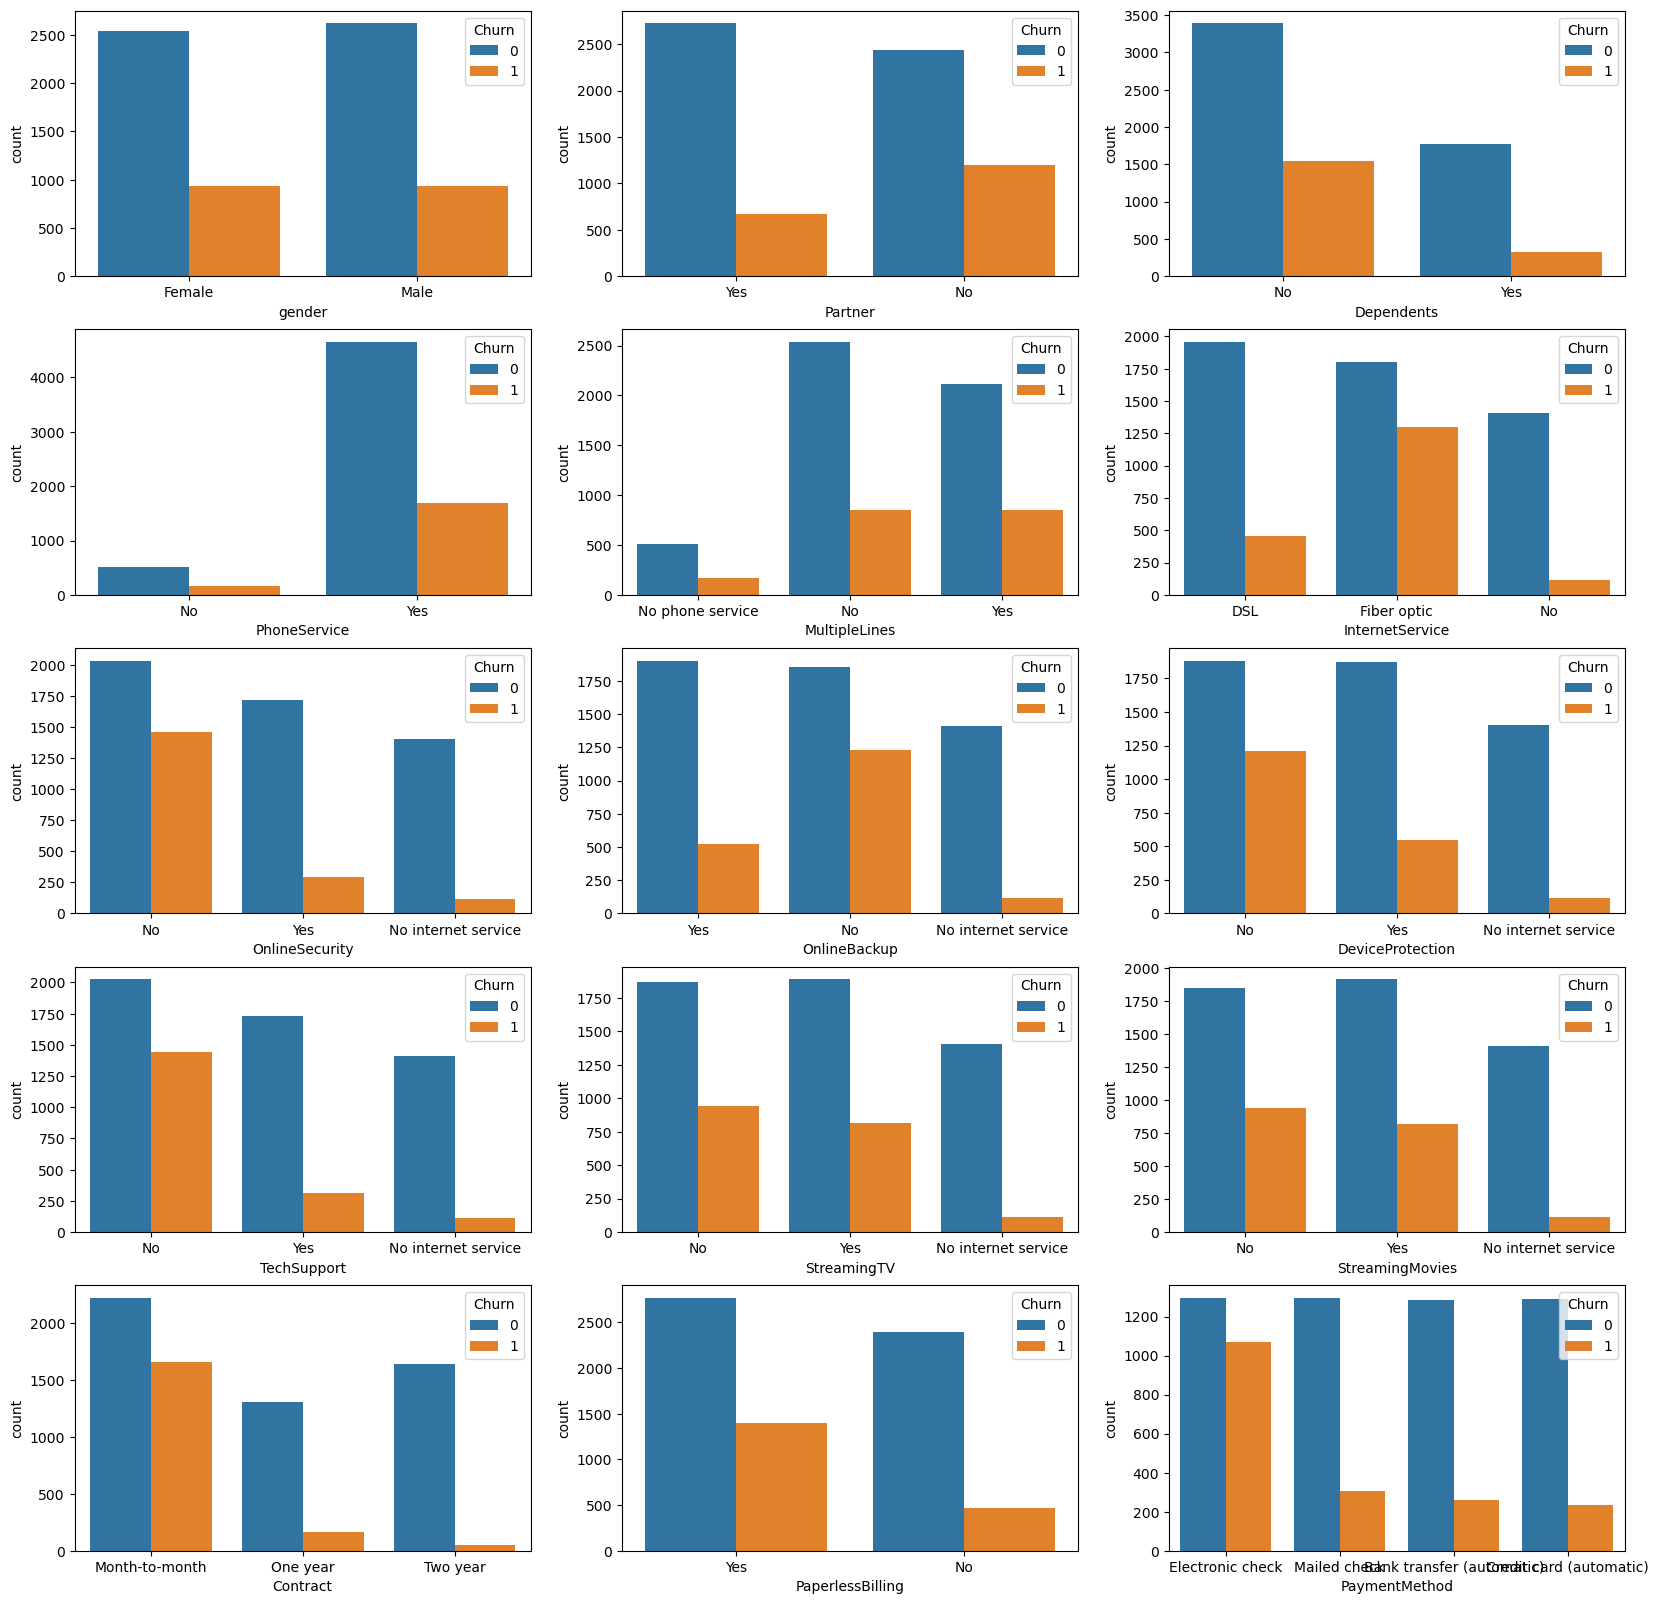

In [30]:
columns_cat = df.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df, x=var, hue='Churn', ax=ax)

/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/afbolivarg/miniconda3/envs/ds-base/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

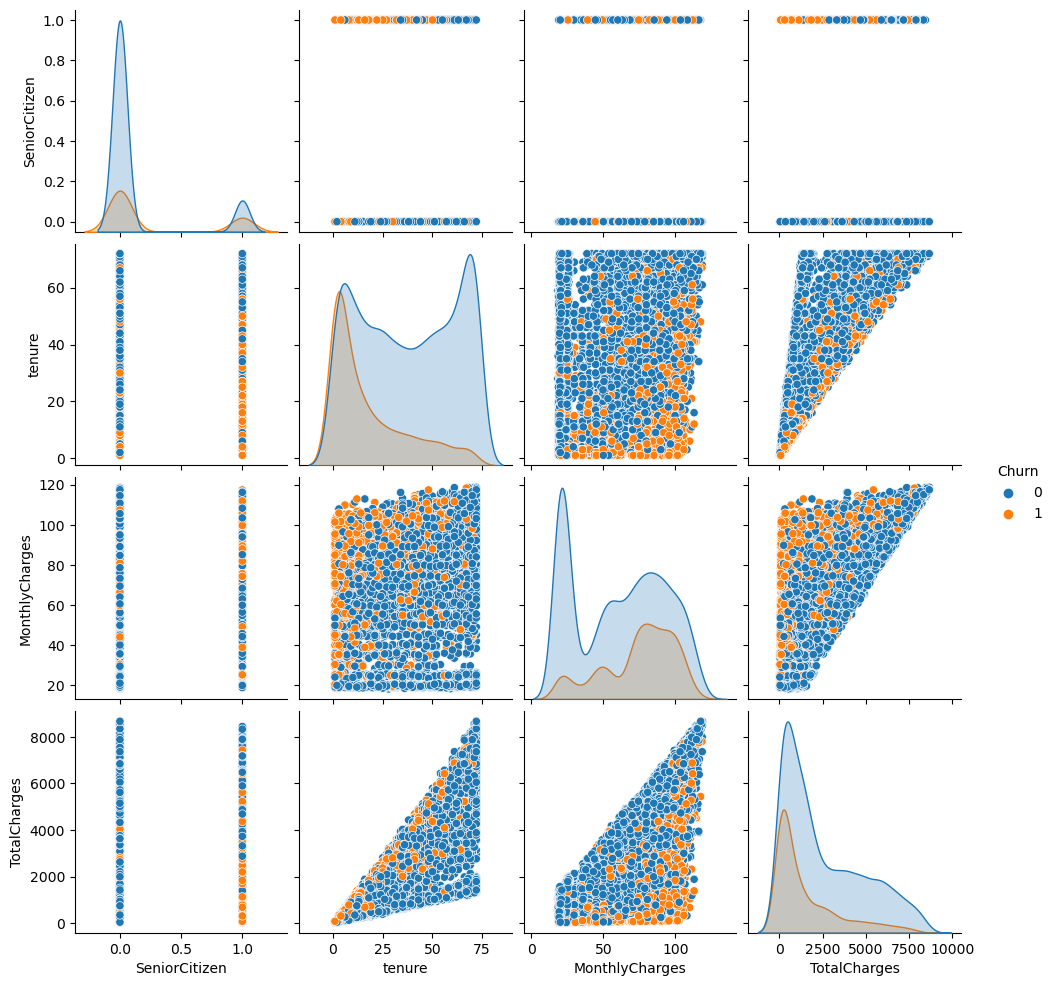

In [31]:
sns.pairplot(data=df, hue='Churn')

## Entrenamiento del modelo de regresión logística binomial


In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(x_train, y_train)

In [51]:
from sklearn import metrics

predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.795734597156398


## Evaluación del modelo


In [52]:
probabilities = model.predict_proba(x_test)
probabilities

array([[0.99027663, 0.00972337],
       [0.86177975, 0.13822025],
       [0.30143576, 0.69856424],
       ...,
       [0.99037062, 0.00962938],
       [0.70106096, 0.29893904],
       [0.82853069, 0.17146931]])

<Axes: >

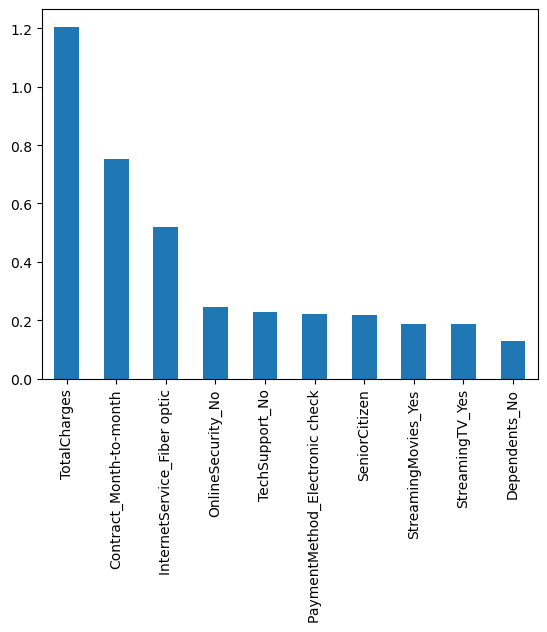

In [54]:
# Importancia de cada feature (churn)
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: >

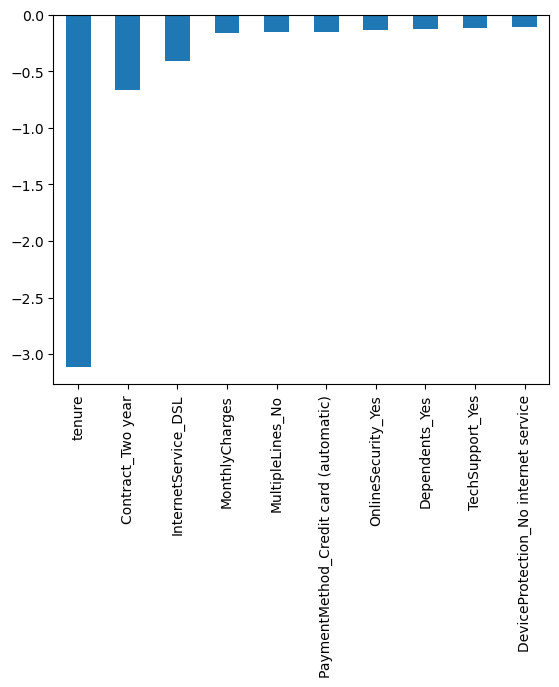

In [58]:
# Importancia de cada feature (no churn)
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending=True)[:10].plot(kind='bar')

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

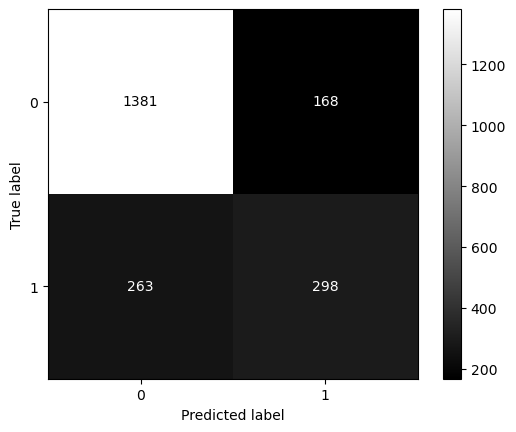

In [65]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap='gray')